In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
#import training data
filename = './data/train.csv'
train_df_raw = pd.read_csv(filename)
print(train_df_raw.head())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


              date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82
date     object
store     int64
item      int64
sales     int64
dtype: object
date     0
store    0
item     0
sales    0
dtype: int64


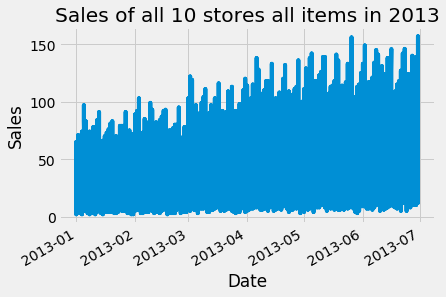

In [5]:
print(train_df_raw.tail())
print(train_df_raw.dtypes)
print(train_df_raw.isnull().sum())
train_df = train_df_raw.copy()
train_df = train_df.set_index('date')
train_df.index = pd.to_datetime(train_df.index)
plt.style.use('fivethirtyeight')
train_subset = train_df['2013-01':'2013-06']
ax = train_subset['sales'].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales of all 10 stores all items in 2013')
plt.show()

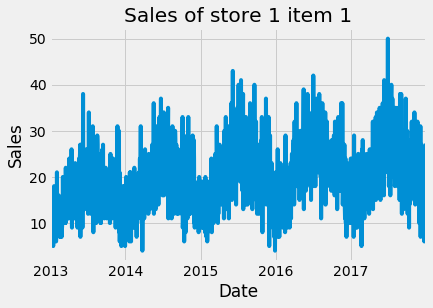

In [6]:
#Sample plot of store 1 item 1
#store1_df = train_df[train_df['store']==1]
#store1_item1 = store1_df[store1_df['item']==1]
store1_item1 = train_df[(train_df.store==1) & (train_df.item==1)]
ax1 = store1_item1['sales'].plot()
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.set_title('Sales of store 1 item 1')
plt.show()

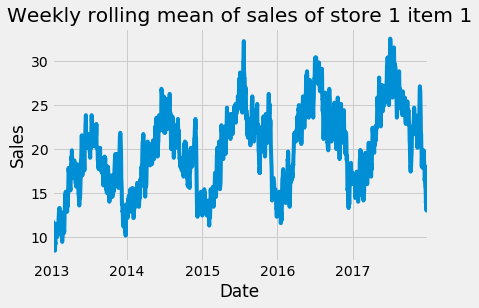

In [7]:
#Moving average plot of store1 item1
store1_item1_mean = store1_item1.rolling(window=7).mean()
ax2 = store1_item1_mean['sales'].plot()
ax2.set_xlabel('Date')
ax2.set_ylabel('Sales')
ax2.set_title('Weekly rolling mean of sales of store 1 item 1')
plt.show()

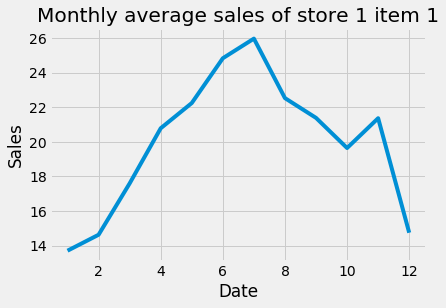

In [8]:
#Aggregation plot
index_month = store1_item1.index.month
store1_item1_bymonth = store1_item1.groupby(index_month).mean()
ax3 = store1_item1_bymonth['sales'].plot()
ax3.set_xlabel('Date')
ax3.set_ylabel('Sales')
ax3.set_title('Monthly average sales of store 1 item 1')
plt.show()

In [7]:
#summarizing data max,mean,sum of each item at each store
items_mean = train_df.groupby(['store','item']).mean()
#items_mean = train_df.groupby(['store','item'])['sales'].mean()
items_max = train_df.groupby(['store','item']).max()
items_max_sum = train_df.groupby(['store','item']).agg(['max','sum'])


In [1]:
items_max_mean_sum = train_df.groupby(['store','item']).agg(['max','mean','sum'])

NameError: name 'train_df' is not defined

In [8]:
#accessing data
print(items_mean)
print(items_mean.loc[1,:]) #store 1 all items
print(items_mean.loc[10,:]) #store 10 all items
print(items_mean.loc[1,1:10,:]) #store 1 item 1 to 10

                sales
store item           
1     1     19.971522
      2     53.148959
      3     33.208105
      4     19.956188
      5     16.612815
...               ...
10    46    66.046550
      47    24.755750
      48    57.814896
      49    33.032311
      50    74.037240

[500 rows x 1 columns]
          sales
item           
1     19.971522
2     53.148959
3     33.208105
4     19.956188
5     16.612815
6     53.060789
7     52.783680
8     69.472070
9     46.504929
10    66.354326
11    63.217963
12    63.233844
13    76.159365
14    53.148959
15    79.680723
16    23.332421
17    29.972070
18    76.345564
19    36.676889
20    42.890471
21    36.176342
22    72.781490
23    26.469880
24    60.000000
25    72.736035
26    43.236035
27    20.050931
28    79.566813
29    63.086528
30    36.318182
31    53.008215
32    39.837897
33    62.755750
34    23.274918
35    59.495071
36    69.309967
37    26.424425
38    73.344469
39    39.694962
40    26.443593
41    20.002738
42

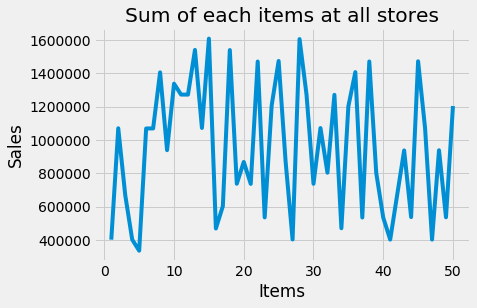

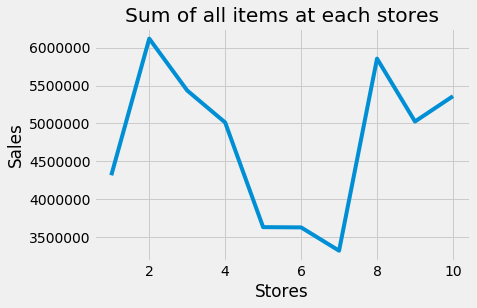

In [9]:
#sum each items and each store
train_df2 = train_df_raw.copy()
train_df2['date'] = pd.to_datetime(train_df2['date'])
train_df2 = train_df2.set_index('date')
sum_all = train_df2['sales'].sum()
sum_items = train_df2.groupby('item')['sales'].sum()
plt.plot(sum_items)
plt.xlabel('Items')
plt.ylabel('Sales')
plt.title('Sum of each items at all stores')
plt.show()
sum_stores = train_df2.groupby('store')['sales'].sum()
plt.plot(sum_stores)
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Sum of all items at each stores')
plt.show()